In [ ]:
# You need the username and password when you run the following code:
# username：ashishmpagote
# password：c7f71f1adc6cf0db5ece73760e1db4e9

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download("https://www.kaggle.com/datasets/debashish311601/commodity-prices/download?datasetVersionNumber=16")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ashishmpagote
Your Kaggle Key: ··········


100%|██████████| 355k/355k [00:00<00:00, 35.5MB/s]

Install all the library


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
register_matplotlib_converters()
from time import time

Access the dataset:

In [ ]:
data = pd.read_csv("/content/commodity-prices/commodity_futures.csv")
data

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
0,2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
1,2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2,2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
3,2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
4,2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5903,2022-11-14,5.933,1776.9,85.87,93.14,1441.75,657.25,3.8335,22.113,991.75,...,3154.00,354.40,28767.0,818.50,19.83,252.85,166.20,84.875,956.25,85.28
5904,2022-11-15,6.034,1776.8,86.92,93.86,1457.25,666.75,3.8200,21.518,990.25,...,3125.00,364.13,30176.0,828.25,20.29,251.61,156.75,85.325,963.00,88.74
5905,2022-11-16,6.200,1775.8,85.59,92.86,1429.25,665.25,3.7735,21.524,991.75,...,3061.50,361.36,27441.0,817.50,20.27,250.80,155.45,85.575,955.50,88.44
5906,2022-11-17,6.369,1763.0,81.64,89.78,1417.00,667.50,3.6880,20.975,956.00,...,2988.00,352.48,24934.0,806.75,19.73,245.47,152.70,84.975,938.00,87.04


In [ ]:
data['Date']=pd.to_datetime(data['Date']) # Change the date(str) to datetime
data.index = data['Date'] # Change the index into datatime
data.head()

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,NaN,NaN,NaN,NaN,456.50,200.75,NaN,NaN,NaN,...,1237.50,NaN,8446.0,247.50,6.10,NaN,116.50,55.975,274.25,51.07
2000-01-04,2000-01-04,2.176,283.7,25.55,24.39,464.25,203.00,0.8480,5.375,213.50,...,1215.00,67.78,8314.0,247.25,5.77,NaN,116.25,55.625,274.00,50.73
2000-01-05,2000-01-05,2.168,282.1,24.91,23.73,469.25,203.00,0.8565,5.210,213.00,...,1209.25,66.55,8307.0,249.75,5.81,NaN,118.60,55.075,276.25,51.56
2000-01-06,2000-01-06,2.196,282.4,24.78,23.62,468.00,203.75,0.8530,5.167,211.25,...,1212.00,66.28,8252.0,248.50,5.77,NaN,116.85,55.175,275.00,52.08
2000-01-07,2000-01-07,2.173,282.9,24.22,23.09,471.50,207.00,0.8540,5.195,205.25,...,1209.25,64.75,8174.0,251.75,5.84,NaN,114.15,55.625,277.75,53.96


Training data (last 2 months):

In [ ]:
time_window = 60

In [ ]:
end_time = max(data['Date'])-timedelta(days=7)
start_time = max(data['Date'])-timedelta(days=time_window+6)
print(start_time)
print(end_time)

2022-09-13 00:00:00
2022-11-11 00:00:00


In [ ]:
data_last_2_months = data[start_time:end_time]
data_last_2_months.head()

,Date,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-13,2022-09-13,8.284,1707.1,87.31,93.17,1534.25,709.00,3.5810,19.390,1057.50,...,3250.50,354.13,24252.00,842.75,18.38,248.04,223.95,95.750,944.00,106.32
2022-09-14,2022-09-14,9.114,1698.2,88.48,94.10,1503.75,709.00,3.5455,19.471,991.50,...,3255.50,337.89,24182.00,853.75,18.27,252.45,217.60,94.700,961.50,107.09
2022-09-15,2022-09-15,8.324,1666.8,85.10,90.84,1451.50,677.50,3.5235,19.175,923.25,...,3215.25,320.52,23096.25,845.00,18.18,242.87,219.15,96.050,926.25,105.24
2022-09-16,2022-09-16,8.029,1675.5,86.39,92.41,1441.50,671.75,3.5580,19.325,946.75,...,3215.25,320.66,23096.25,836.25,17.94,243.84,216.15,96.250,914.50,102.45
2022-09-19,2022-09-19,7.752,1667.6,85.73,92.00,1461.25,678.25,3.5575,19.273,963.00,...,3165.75,331.08,24556.00,830.50,17.69,246.41,224.05,96.475,909.75,97.54


In [ ]:
data_last_2_months.drop(columns='Date',inplace=True)
data_last_2_months

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-13,8.284,1707.1,87.31,93.17,1534.25,709.00,3.5810,19.390,1057.50,144.800,...,3250.50,354.13,24252.00,842.75,18.38,248.04,223.95,95.750,944.00,106.32
2022-09-14,9.114,1698.2,88.48,94.10,1503.75,709.00,3.5455,19.471,991.50,144.350,...,3255.50,337.89,24182.00,853.75,18.27,252.45,217.60,94.700,961.50,107.09
2022-09-15,8.324,1666.8,85.10,90.84,1451.50,677.50,3.5235,19.175,923.25,145.625,...,3215.25,320.52,23096.25,845.00,18.18,242.87,219.15,96.050,926.25,105.24
2022-09-16,8.029,1675.5,86.39,92.41,1441.50,671.75,3.5580,19.325,946.75,145.275,...,3215.25,320.66,23096.25,836.25,17.94,243.84,216.15,96.250,914.50,102.45
2022-09-19,7.752,1667.6,85.73,92.00,1461.25,678.25,3.5575,19.273,963.00,145.725,...,3165.75,331.08,24556.00,830.50,17.69,246.41,224.05,96.475,909.75,97.54
2022-09-20,7.717,1661.0,84.45,90.62,1478.75,692.00,3.5480,19.102,976.25,146.300,...,3146.25,337.22,24918.00,893.75,18.19,244.78,228.10,95.975,963.00,93.54
2022-09-21,7.779,1665.8,82.94,89.83,1461.25,685.50,3.5120,19.411,967.25,145.875,...,3114.50,333.38,24894.00,903.75,18.22,248.65,221.30,94.425,967.00,97.25
2022-09-22,7.089,1671.4,83.49,90.46,1457.00,688.25,3.4985,19.548,1006.25,144.850,...,3123.75,341.15,24502.00,910.75,18.49,251.57,223.55,94.125,979.50,96.83
2022-09-23,6.821,1641.8,78.91,86.26,1428.75,674.75,3.3650,19.510,961.75,144.400,...,3123.75,326.41,24502.00,884.75,18.20,237.70,219.65,93.350,954.75,96.83


Fill the missing date with some data, then predict the price for some commodity by ARIMA model:

In [ ]:
import datetime
base = end_time
date_list = pd.DataFrame([(base - datetime.timedelta(days=x)).date() for x in range(time_window)],columns=['Date'])
date_list['Date'] = pd.to_datetime(date_list['Date'])
date_list

,Date
0,2022-11-11
1,2022-11-10
2,2022-11-09
3,2022-11-08
4,2022-11-07
5,2022-11-06
6,2022-11-05
7,2022-11-04
8,2022-11-03
9,2022-11-02


In [ ]:
data_last_2_months = date_list.merge(data_last_2_months,on='Date',how='left')
data_last_2_months.index = data_last_2_months['Date']
data_last_2_months.drop(columns='Date',inplace=True)
data_last_2_months.head()

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2022-11-11,6.223,1766.4,89.08,96.02,1461.50,657.75,3.8900,21.560,989.50,152.475,...,2900.5,360.78,25853.0,812.50,19.60,260.17,171.65,84.100,937.00,88.44
2022-11-10,6.239,1753.7,86.47,93.67,1430.50,653.25,3.7580,21.702,1028.50,153.075,...,2900.5,356.94,25853.0,803.50,19.41,256.63,171.00,84.875,925.25,86.38
2022-11-09,5.865,1713.7,85.83,92.65,1459.75,664.50,3.7000,21.327,1028.50,151.575,...,2868.5,365.63,24596.0,806.50,19.38,254.46,165.15,85.275,930.00,86.50
2022-11-08,6.138,1716.0,88.91,95.36,1444.00,667.50,3.6825,21.502,1067.25,153.050,...,2947.5,377.07,23906.5,827.75,19.00,263.67,166.45,85.575,945.75,87.68
2022-11-07,6.944,1680.5,91.79,97.92,1440.00,675.75,3.6035,20.919,1096.50,153.050,...,2907.5,378.11,23292.0,845.75,18.68,265.31,170.55,87.050,957.25,87.49


In [ ]:
# Sort the date then date column has the right order
data_last_2_months = data_last_2_months.sort_values(by='Date')
data_last_2_months.head()

,NATURAL GAS,GOLD,WTI CRUDE,BRENT CRUDE,SOYBEANS,CORN,COPPER,SILVER,LOW SULPHUR GAS OIL,LIVE CATTLE,...,ZINC,ULS DIESEL,NICKEL,WHEAT,SUGAR,GASOLINE,COFFEE,LEAN HOGS,HRW WHEAT,COTTON
Date,,,,,,,,,,,,,,,,,,,,,
2022-09-13,8.284,1707.1,87.31,93.17,1534.25,709.00,3.5810,19.390,1057.50,144.800,...,3250.50,354.13,24252.00,842.75,18.38,248.04,223.95,95.75,944.00,106.32
2022-09-14,9.114,1698.2,88.48,94.10,1503.75,709.00,3.5455,19.471,991.50,144.350,...,3255.50,337.89,24182.00,853.75,18.27,252.45,217.60,94.70,961.50,107.09
2022-09-15,8.324,1666.8,85.10,90.84,1451.50,677.50,3.5235,19.175,923.25,145.625,...,3215.25,320.52,23096.25,845.00,18.18,242.87,219.15,96.05,926.25,105.24
2022-09-16,8.029,1675.5,86.39,92.41,1441.50,671.75,3.5580,19.325,946.75,145.275,...,3215.25,320.66,23096.25,836.25,17.94,243.84,216.15,96.25,914.50,102.45
2022-09-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Predict the price for "NATURAL GAS":

In [ ]:
data_last_2_months_natural_gas = data_last_2_months[['NATURAL GAS']]

# Fill the missing date with some data:
data_last_2_months_natural_gas['NATURAL GAS']=data_last_2_months_natural_gas['NATURAL GAS'].interpolate(method='time')
data_last_2_months_natural_gas

<ipython-input-13-5125d22244a0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_2_months_natural_gas['NATURAL GAS']=data_last_2_months_natural_gas['NATURAL GAS'].interpolate(method='time')


,NATURAL GAS
Date,
2022-09-13,8.284000
2022-09-14,9.114000
2022-09-15,8.324000
2022-09-16,8.029000
2022-09-17,7.936667
2022-09-18,7.844333
2022-09-19,7.752000
2022-09-20,7.717000
2022-09-21,7.779000


Text(0, 0.5, 'price of natural gas')

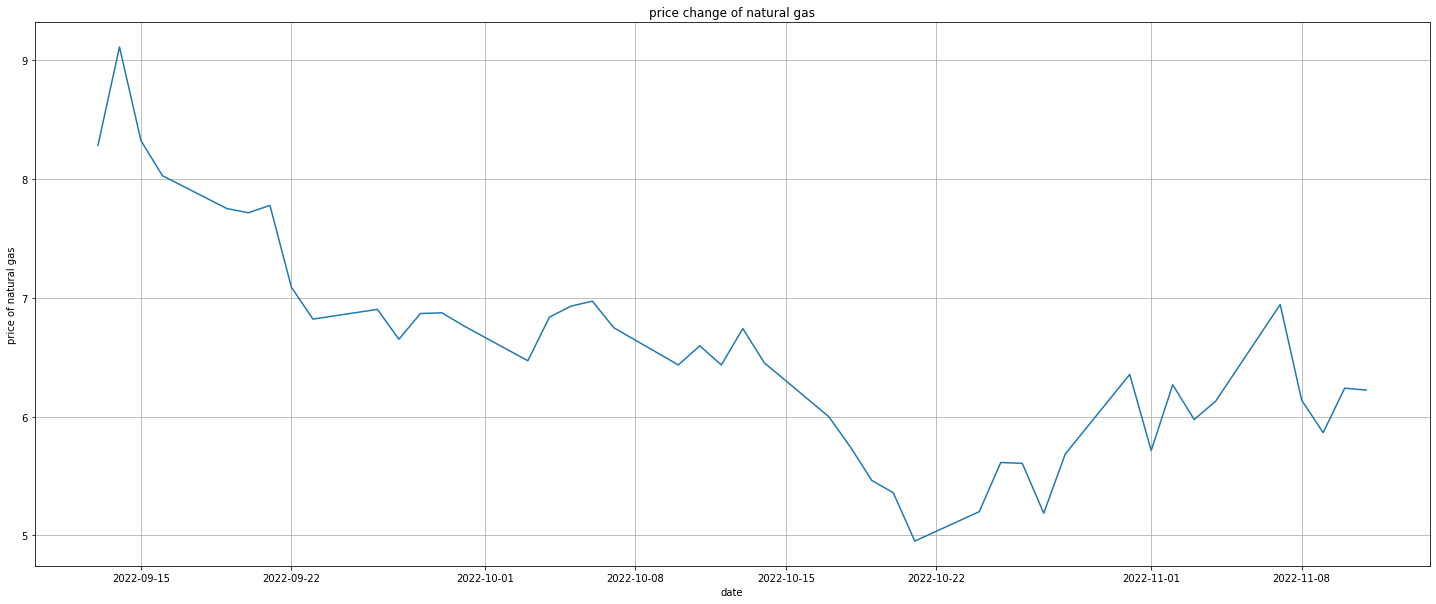

In [ ]:
# Visaulization (price change of the commodity from last 2 months)
plt.figure(figsize=(25,10))
plt.plot(data[start_time:end_time]['Date'], data[start_time:end_time]['NATURAL GAS'])
plt.grid()
plt.title('price change of natural gas')
plt.xlabel('date')
plt.ylabel('price of natural gas')

<ipython-input-15-33ecb6ecdedd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_2_months_natural_gas['diff_1'] = data_last_2_months_natural_gas['NATURAL GAS'].diff(1)
<ipython-input-15-33ecb6ecdedd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_2_months_natural_gas['diff_2'] = data_last_2_months_natural_gas['diff_1'].diff(1)
<ipython-input-15-33ecb6ecdedd>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

timeseries adf: (-2.1556163138559192, 0.22274649744919817, 0, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 13.293609649846204)
timeseries diff_1 adf: (-8.755726564422034, 2.7588593904997847e-14, 0, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 15.858495620488512)
timeseries diff_2 adf: (-8.151126043267618, 9.689715401909962e-13, 3, 56, {'1%': -3.552928203580539, '5%': -2.9147306250000002, '10%': -2.595137155612245}, 24.378080308072583)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3488eb2220>,
      dtype=object)

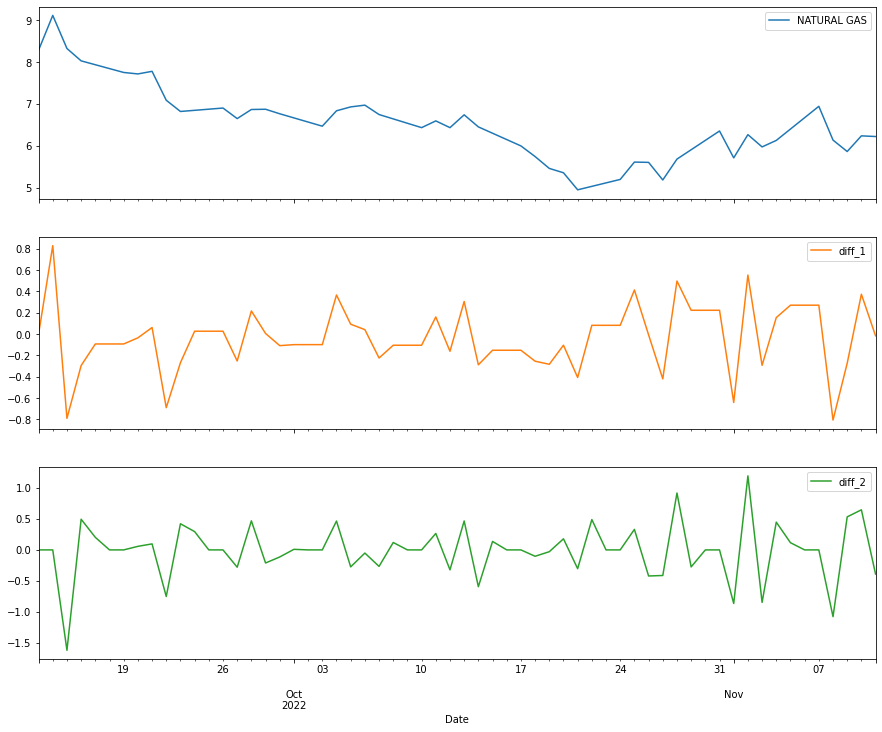

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller as ADF
import seaborn as sns

# Find the first difference and the second difference of a time series
data_last_2_months_natural_gas['diff_1'] = data_last_2_months_natural_gas['NATURAL GAS'].diff(1)
data_last_2_months_natural_gas['diff_2'] = data_last_2_months_natural_gas['diff_1'].diff(1)

data_last_2_months_natural_gas['diff_1'] = data_last_2_months_natural_gas['diff_1'].fillna(0)
data_last_2_months_natural_gas['diff_2'] = data_last_2_months_natural_gas['diff_2'].fillna(0)

adf = ADF(data_last_2_months_natural_gas['NATURAL GAS'].tolist())
diff1_adf = ADF(data_last_2_months_natural_gas['diff_1'].tolist())
diff2_adf = ADF(data_last_2_months_natural_gas['diff_2'].tolist())
print('timeseries adf:', adf)
print('timeseries diff_1 adf:', diff1_adf)
print('timeseries diff_2 adf:', diff2_adf)

# Visualization
data_last_2_months_natural_gas.plot(subplots=True, figsize=(15,12))

For parameter 'd' in ARIMA model, we choose d = 1, since the plot of data_last_2_months_natural_gas['diff_1'] looks stable enough.

In [ ]:
# delete column diff_1 and column diff_2, because when we apply the ARIMA model, the time series should be 1-dimensional
data_last_2_months_natural_gas = data_last_2_months_natural_gas.drop(labels=['diff_2'], axis=1)
data_last_2_months_natural_gas = data_last_2_months_natural_gas.drop(labels=['diff_1'], axis=1)

/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


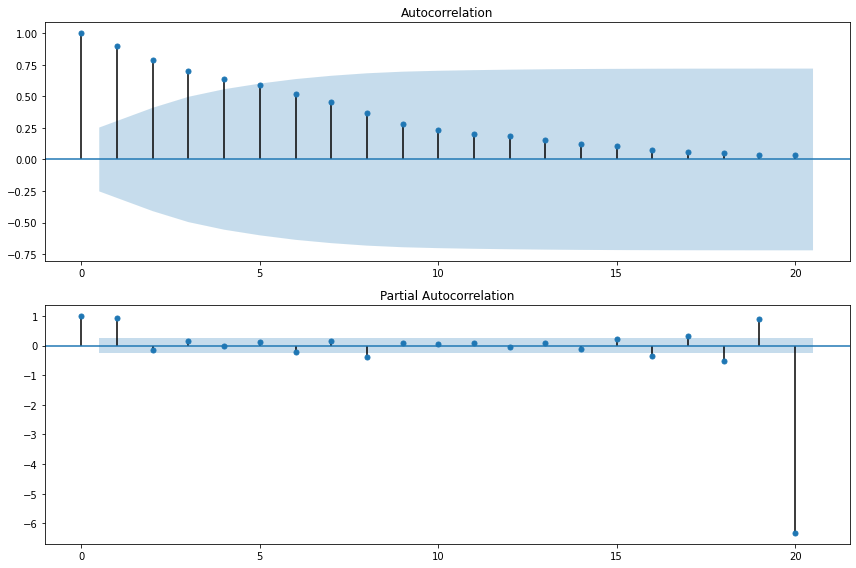

In [ ]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_last_2_months_natural_gas, lags=20, ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_last_2_months_natural_gas, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()

From the graph above, we can decide p = 1 and q = 4. (More explanation of choosing the value of 'p,d,q' will be in paper)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:            NATURAL GAS   No. Observations:                   60
Model:                 ARIMA(1, 1, 4)   Log Likelihood                 -12.135
Date:                Wed, 14 Dec 2022   AIC                             36.270
Time:                        02:58:44   BIC                             48.735
Sample:                    09-13-2022   HQIC                            41.136
                         - 11-11-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7223      0.246     -2.933      0.003      -1.205      -0.240
ma.L1          0.6896      1.417      0.487      0.626      -2.087       3.467
ma.L2         -0.1870      0.439     -0.426      0.6

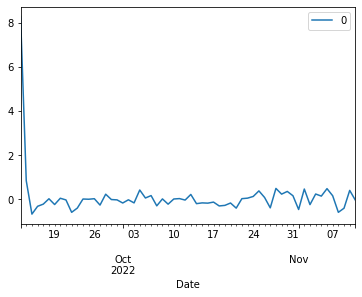

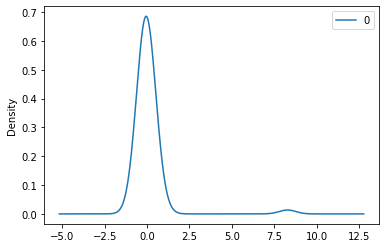

               0
count  60.000000
mean    0.095224
std     1.115054
min    -0.687938
25%    -0.240476
50%    -0.019474
75%     0.145685
max     8.284000


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
model = ARIMA(data_last_2_months_natural_gas, order=(1,1,4))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

MAPE=mean(abs(actuals-predicted)/(actuals))

SMAPE=mean(abs(actuals-predicted)/((actuals+predicted)/2))

RMSE= np.sqrt(mean(errors*errors))


computing training MAPE, SMAPE, RMSE
0.035795789970176725
0.03607198166625253
0.29906088796819236


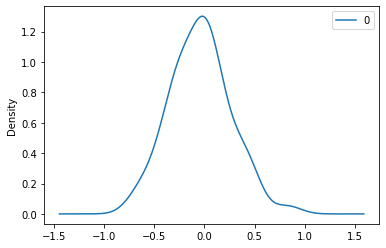

In [ ]:
residuals[1:].plot(kind='kde')

k=pd.concat([data_last_2_months_natural_gas,residuals],axis=1)[1:]
k.columns=['actual','errors']

mape = ((k.errors).abs() / k.actual.abs()).mean()
smape = ((k.errors).abs() / ((k.actual.abs()+(k.actual+k.errors).abs())/2)).mean()
rmse = np.sqrt((k.errors*k.errors).mean())

print('computing training MAPE, SMAPE, RMSE')
print(mape)
print(smape)
print(rmse)

In [ ]:
start = pd.to_datetime(max(data['Date'])-timedelta(days=6))
end = pd.to_datetime(max(data['Date']))
predictions = model_fit.predict(start, end)
predictions

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2022-11-12    6.169303
2022-11-13    6.266727
2022-11-14    6.159665
2022-11-15    6.242074
2022-11-16    6.182549
2022-11-17    6.225544
2022-11-18    6.194489
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
residuals_db = pd.DataFrame({'actuals':data[start:end]['NATURAL GAS'],'predicted':predictions})
residuals_db = residuals_db.dropna(axis=0)
residuals_db['residiue']=residuals_db['actuals']-residuals_db['predicted']
residuals_db['abs_residiue']=abs(residuals_db['actuals']-residuals_db['predicted'])
residuals_db['APE']=abs(residuals_db['actuals']-residuals_db['predicted'])/residuals_db['actuals']
residuals_db

,actuals,predicted,residiue,abs_residiue,APE
2022-11-14,5.933,6.159665,-0.226665,0.226665,0.038204
2022-11-15,6.034,6.242074,-0.208074,0.208074,0.034484
2022-11-16,6.200,6.182549,0.017451,0.017451,0.002815
2022-11-17,6.369,6.225544,0.143456,0.143456,0.022524
2022-11-18,6.355,6.194489,0.160511,0.160511,0.025257


In [ ]:
from google.colab import drive
drive.mount('drive')

import openpyxl

residuals_db.to_excel('drive/My Drive/Predictions1.xlsx', sheet_name='Natural_Gas', index=True)
residuals_db_natural_gas=residuals_db[['actuals','predicted']]

In [ ]:
print('computing testing MAPE, SMAPE, RMSE')
print(residuals_db.APE.mean())
print((residuals_db.abs_residiue/((residuals_db.actuals+residuals_db.predicted)/2)).mean())
print(np.sqrt((residuals_db.residiue*residuals_db.residiue).mean()))

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Predict the price for "GOLD":

In [ ]:
data_last_2_months_gold = data_last_2_months[['GOLD']]

# Fill the missing date with some data:
data_last_2_months_gold['GOLD'] = data_last_2_months_gold['GOLD'].interpolate(method='time')
data_last_2_months_gold

In [ ]:
# Visaulization (price change of the commodity from last 2 months)
plt.figure(figsize=(25,10))
plt.plot(data[start_time:end_time]['Date'], data[start_time:end_time]['GOLD'])
plt.grid()
plt.title('price change of gold')
plt.xlabel('date')
plt.ylabel('price of gold')

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import seaborn as sns

# Find the fist difference and the second difference of a time series
data_last_2_months_gold['diff_1'] = data_last_2_months_gold['GOLD'].diff(1)
data_last_2_months_gold['diff_2'] = data_last_2_months_gold['diff_1'].diff(1)

data_last_2_months_gold['diff_1'] = data_last_2_months_gold['diff_1'].fillna(0)
data_last_2_months_gold['diff_2'] = data_last_2_months_gold['diff_2'].fillna(0)

adf = ADF(data_last_2_months_gold['GOLD'].tolist())
diff1_adf = ADF(data_last_2_months_gold['diff_1'].tolist())
diff2_adf = ADF(data_last_2_months_gold['diff_2'].tolist())
print('timeseries adf:', adf)
print('timeseries diff_1 adf:', diff1_adf)
print('timeseries diff_2 adf:', diff2_adf)

# Visualization
data_last_2_months_gold.plot(subplots=True, figsize=(15,12))


# delete column diff_1 and column diff_2, because when we apply the ARIMA model, the time series should be 1-dimensional
data_last_2_months_gold = data_last_2_months_gold.drop(labels=['diff_2'], axis=1)
data_last_2_months_gold = data_last_2_months_gold.drop(labels=['diff_1'], axis=1)


fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_last_2_months_gold, lags=20, ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_last_2_months_gold, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()

For parameter 'd' in ARIMA model, we choose d = 1, since the plot of data_last_2_months_natural_gas['diff_1'] looks stable enough.

From the graph above, we can decide p = 1 and q = 3. (More explanation of choosing the value of 'p,d,q' will be in paper)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
model = ARIMA(data_last_2_months_gold, order=(1,1,3))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
residuals[1:].plot(kind='kde')

k=pd.concat([data_last_2_months_gold,residuals],axis=1)[1:]
k.columns=['actual','errors']

mape = ((k.errors).abs() / k.actual.abs()).mean()
smape = ((k.errors).abs() / ((k.actual.abs()+(k.actual+k.errors).abs())/2)).mean()
rmse = np.sqrt((k.errors*k.errors).mean())

print('computing training MAPE, SMAPE, RMSE')
print(mape)
print(smape)
print(rmse)

In [ ]:
start = pd.to_datetime(max(data['Date'])-timedelta(days=6))
end = pd.to_datetime(max(data['Date']))
predictions = model_fit.predict(start, end)
predictions

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2022-11-12    1774.769493
2022-11-13    1783.356106
2022-11-14    1790.075281
2022-11-15    1795.121276
2022-11-16    1798.910739
2022-11-17    1801.756565
2022-11-18    1803.893736
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
residuals_db = pd.DataFrame({'actuals':data[start:end]['GOLD'],'predicted':predictions})
residuals_db = residuals_db.dropna(axis=0)
residuals_db['residiue']=residuals_db['actuals']-residuals_db['predicted']
residuals_db['abs_residiue']=abs(residuals_db['actuals']-residuals_db['predicted'])
residuals_db['APE']=abs(residuals_db['actuals']-residuals_db['predicted'])/residuals_db['actuals']
residuals_db

,actuals,predicted,residiue,abs_residiue,APE
2022-11-14,1776.9,1790.075281,-13.175281,13.175281,0.007415
2022-11-15,1776.8,1795.121276,-18.321276,18.321276,0.010311
2022-11-16,1775.8,1798.910739,-23.110739,23.110739,0.013014
2022-11-17,1763.0,1801.756565,-38.756565,38.756565,0.021983
2022-11-18,1759.7,1803.893736,-44.193736,44.193736,0.025114


In [ ]:
residuals_db.to_excel('drive/My Drive/Predictions2.xlsx', sheet_name='GOLD', index=True)
residuals_db_gold=residuals_db[['actuals','predicted']]

In [ ]:
print('computing testing MAPE, SMAPE, RMSE')
print(residuals_db.APE.mean())
print((residuals_db.abs_residiue/((residuals_db.actuals+residuals_db.predicted)/2)).mean())
print(np.sqrt((residuals_db.residiue*residuals_db.residiue).mean()))

computing testing MAPE, SMAPE, RMSE
0.015567615397633742
0.015424640232077697
29.995069934988937


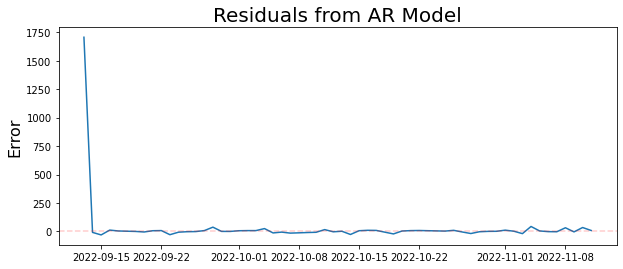

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Predict the price for "COTTON":

In [ ]:
data_last_2_months_cotton = data_last_2_months[['COTTON']]

# Fill the missing date with some data:
data_last_2_months_cotton['COTTON'] = data_last_2_months_cotton['COTTON'].interpolate(method='time')
data_last_2_months_cotton

<ipython-input-209-e5e05b05d577>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_2_months_cotton['COTTON'] = data_last_2_months_cotton['COTTON'].interpolate(method='time')


,COTTON
Date,
2022-09-13,106.320000
2022-09-14,107.090000
2022-09-15,105.240000
2022-09-16,102.450000
2022-09-17,100.813333
2022-09-18,99.176667
2022-09-19,97.540000
2022-09-20,93.540000
2022-09-21,97.250000


Text(0, 0.5, 'price of cotton')

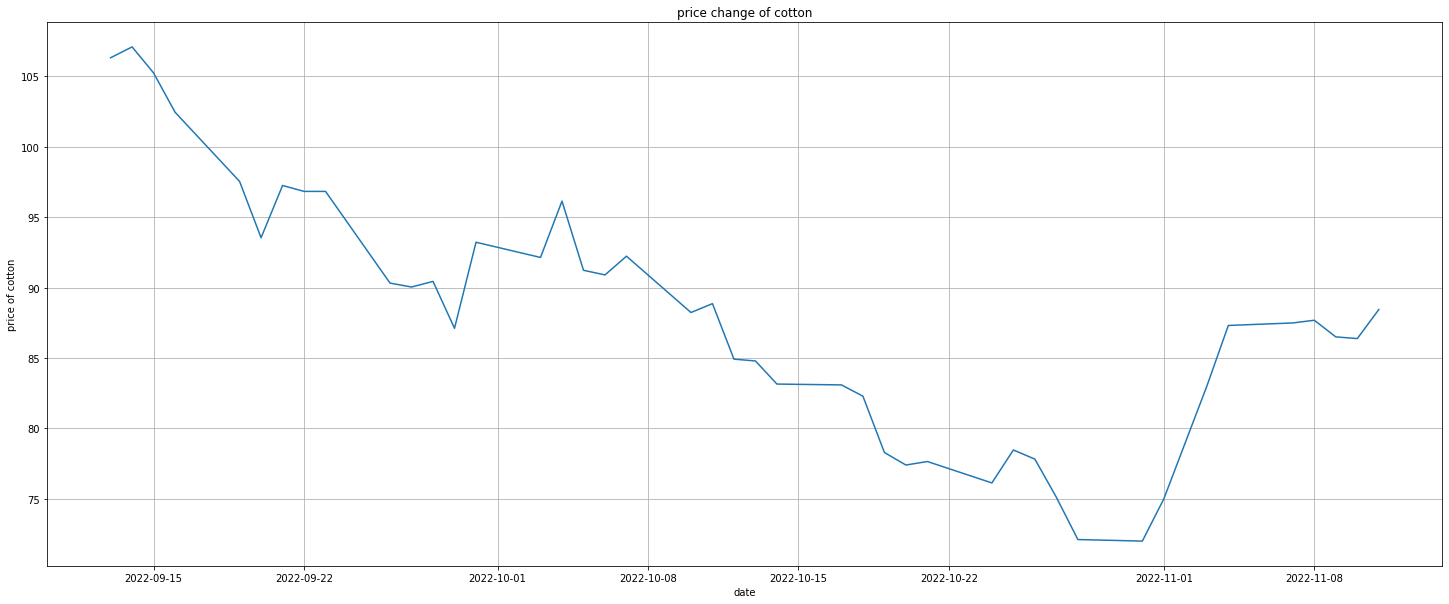

In [ ]:
# Visaulization (price change of the commodity from last 2 months)
plt.figure(figsize=(25,10))
plt.plot(data[start_time:end_time]['Date'], data[start_time:end_time]['COTTON'])
plt.grid()
plt.title('price change of cotton')
plt.xlabel('date')
plt.ylabel('price of cotton')

<ipython-input-211-af097b6044c8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_2_months_cotton['diff_1'] = data_last_2_months_cotton['COTTON'].diff(1)
<ipython-input-211-af097b6044c8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_2_months_cotton['diff_2'] = data_last_2_months_cotton['diff_1'].diff(1)
<ipython-input-211-af097b6044c8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

timeseries adf: (-1.9337577228169889, 0.31635079449807557, 9, 50, {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}, 205.35951147687672)
timeseries diff_1 adf: (-0.8418099382221431, 0.8065312591509883, 8, 51, {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}, 207.12131031473018)
timeseries diff_2 adf: (-7.048005581079298, 5.621018256723831e-10, 7, 52, {'1%': -3.562878534649522, '5%': -2.918973284023669, '10%': -2.597393446745562}, 206.26431765571198)


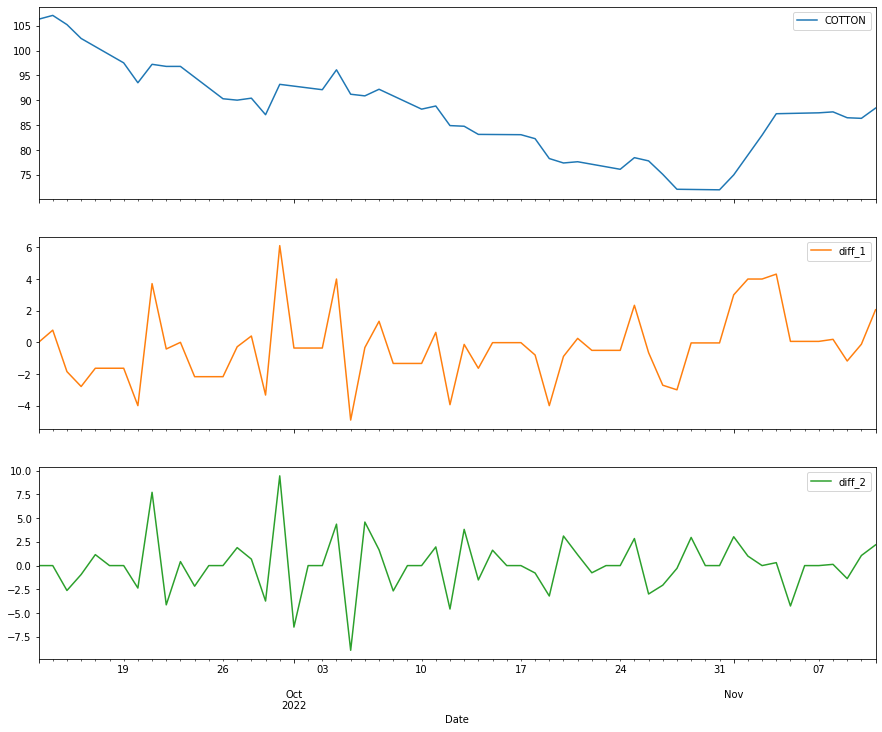

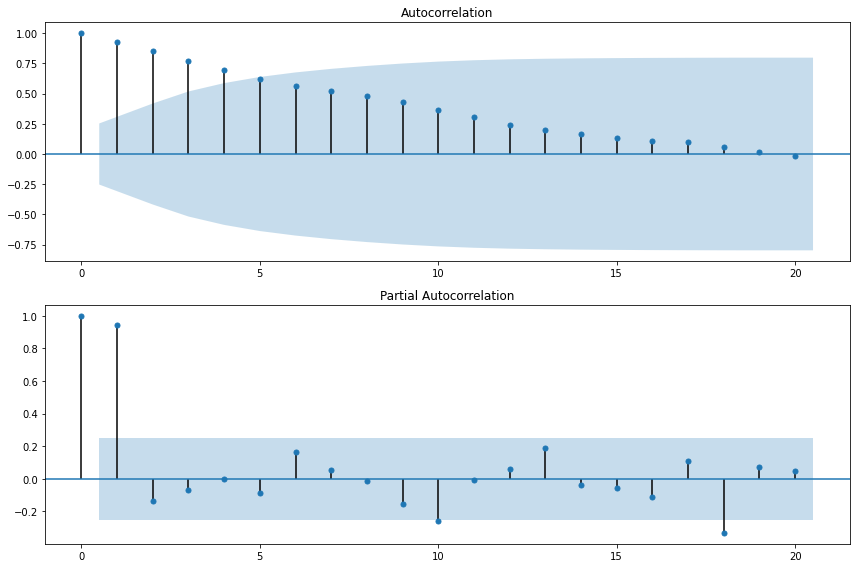

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import seaborn as sns

# Find the fist difference and the second difference of a time series
data_last_2_months_cotton['diff_1'] = data_last_2_months_cotton['COTTON'].diff(1)
data_last_2_months_cotton['diff_2'] = data_last_2_months_cotton['diff_1'].diff(1)

data_last_2_months_cotton['diff_1'] = data_last_2_months_cotton['diff_1'].fillna(0)
data_last_2_months_cotton['diff_2'] = data_last_2_months_cotton['diff_2'].fillna(0)

adf = ADF(data_last_2_months_cotton['COTTON'].tolist())
diff1_adf = ADF(data_last_2_months_cotton['diff_1'].tolist())
diff2_adf = ADF(data_last_2_months_cotton['diff_2'].tolist())
print('timeseries adf:', adf)
print('timeseries diff_1 adf:', diff1_adf)
print('timeseries diff_2 adf:', diff2_adf)

# Visualization
data_last_2_months_cotton.plot(subplots=True, figsize=(15,12))


# delete column diff_1 and column diff_2, because when we apply the ARIMA model, the time series should be 1-dimensional
data_last_2_months_cotton = data_last_2_months_cotton.drop(labels=['diff_2'], axis=1)
data_last_2_months_cotton = data_last_2_months_cotton.drop(labels=['diff_1'], axis=1)


fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_last_2_months_cotton, lags=20, ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_last_2_months_cotton, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()

For parameter 'd' in ARIMA model, we choose d = 1, since the plot of data_last_2_months_natural_gas['diff_1'] looks stable enough.

From the graph above, we can decide p = 1 and q = 5. (More explanation of choosing the value of 'p,d,q' will be in paper)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                 COTTON   No. Observations:                   60
Model:                 ARIMA(1, 1, 5)   Log Likelihood                -116.358
Date:                Mon, 12 Dec 2022   AIC                            246.716
Time:                        07:48:52   BIC                            261.259
Sample:                    09-13-2022   HQIC                           252.393
                         - 11-11-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1757      0.399      0.441      0.660      -0.606       0.958
ma.L1          0.0104      3.275      0.003      0.997      -6.409       6.430
ma.L2          0.3705      2.523      0.147      0.8

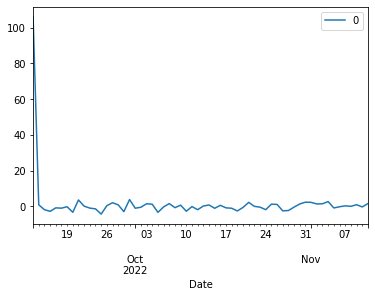

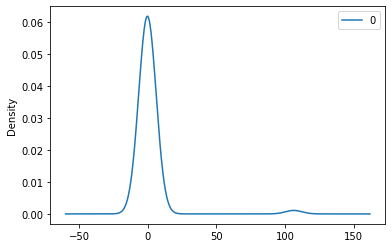

                0
count   60.000000
mean     1.561812
std     13.863267
min     -4.410210
25%     -1.112948
50%     -0.227892
75%      1.133264
max    106.320000


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
model = ARIMA(data_last_2_months_cotton, order=(1,1,5))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

computing training MAPE, SMAPE, RMSE
0.016206360280459246
0.016252452698785235
1.7545760632755778


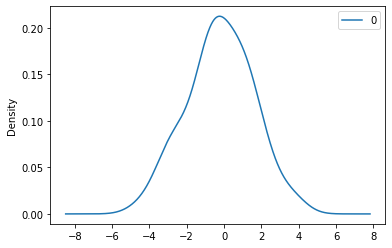

In [ ]:
residuals[1:].plot(kind='kde')

k=pd.concat([data_last_2_months_cotton,residuals],axis=1)[1:]
k.columns=['actual','errors']

mape = ((k.errors).abs() / k.actual.abs()).mean()
smape = ((k.errors).abs() / ((k.actual.abs()+(k.actual+k.errors).abs())/2)).mean()
rmse = np.sqrt((k.errors*k.errors).mean())

print('computing training MAPE, SMAPE, RMSE')
print(mape)
print(smape)
print(rmse)

In [ ]:
start = pd.to_datetime(max(data['Date'])-timedelta(days=6))
end = pd.to_datetime(max(data['Date']))
predictions = model_fit.predict(start, end)
predictions

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2022-11-12    88.595224
2022-11-13    89.554086
2022-11-14    89.160726
2022-11-15    90.072768
2022-11-16    89.293436
2022-11-17    89.156471
2022-11-18    89.132400
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
residuals_db = pd.DataFrame({'actuals':data[start:end]['COTTON'],'predicted':predictions})
residuals_db = residuals_db.dropna(axis=0)
residuals_db['residiue']=residuals_db['actuals']-residuals_db['predicted']
residuals_db['abs_residiue']=abs(residuals_db['actuals']-residuals_db['predicted'])
residuals_db['APE']=abs(residuals_db['actuals']-residuals_db['predicted'])/residuals_db['actuals']
residuals_db

,actuals,predicted,residiue,abs_residiue,APE
2022-11-14,85.28,89.160726,-3.880726,3.880726,0.045506
2022-11-15,88.74,90.072768,-1.332768,1.332768,0.015019
2022-11-16,88.44,89.293436,-0.853436,0.853436,0.009650
2022-11-17,87.04,89.156471,-2.116471,2.116471,0.024316
2022-11-18,85.85,89.132400,-3.282400,3.282400,0.038234


In [ ]:
residuals_db.to_excel('drive/My Drive/Predictions3.xlsx', sheet_name='COTTON', index=True)
residuals_db_cotton=residuals_db[['actuals','predicted']]

In [ ]:
print('computing testing MAPE, SMAPE, RMSE')
print(residuals_db.APE.mean())
print((residuals_db.abs_residiue/((residuals_db.actuals+residuals_db.predicted)/2)).mean())
print(np.sqrt((residuals_db.residiue*residuals_db.residiue).mean()))

computing testing MAPE, SMAPE, RMSE
0.026544918694536124
0.026108933385196764
2.5619625076027757


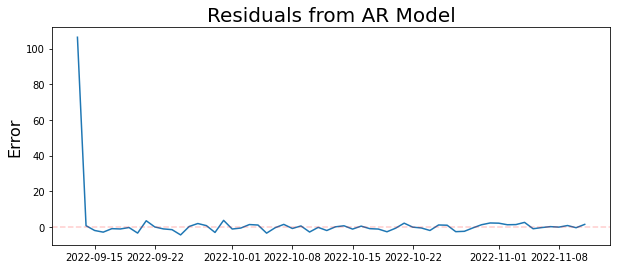

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Predict the price for "SOYBEANS":

In [ ]:
# Fill the missing date with some data:
data_last_2_months_soyabean=data_last_2_months[['SOYBEANS']]
data_last_2_months_soyabean['SOYBEANS']=data_last_2_months_soyabean['SOYBEANS'].interpolate(method='time')
data_last_2_months_soyabean

<ipython-input-219-bb63a6e5201c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_2_months_soyabean['SOYBEANS']=data_last_2_months_soyabean['SOYBEANS'].interpolate(method='time')


,SOYBEANS
Date,
2022-09-13,1534.250000
2022-09-14,1503.750000
2022-09-15,1451.500000
2022-09-16,1441.500000
2022-09-17,1448.083333
2022-09-18,1454.666667
2022-09-19,1461.250000
2022-09-20,1478.750000
2022-09-21,1461.250000


Text(0, 0.5, 'price of soyabeans')

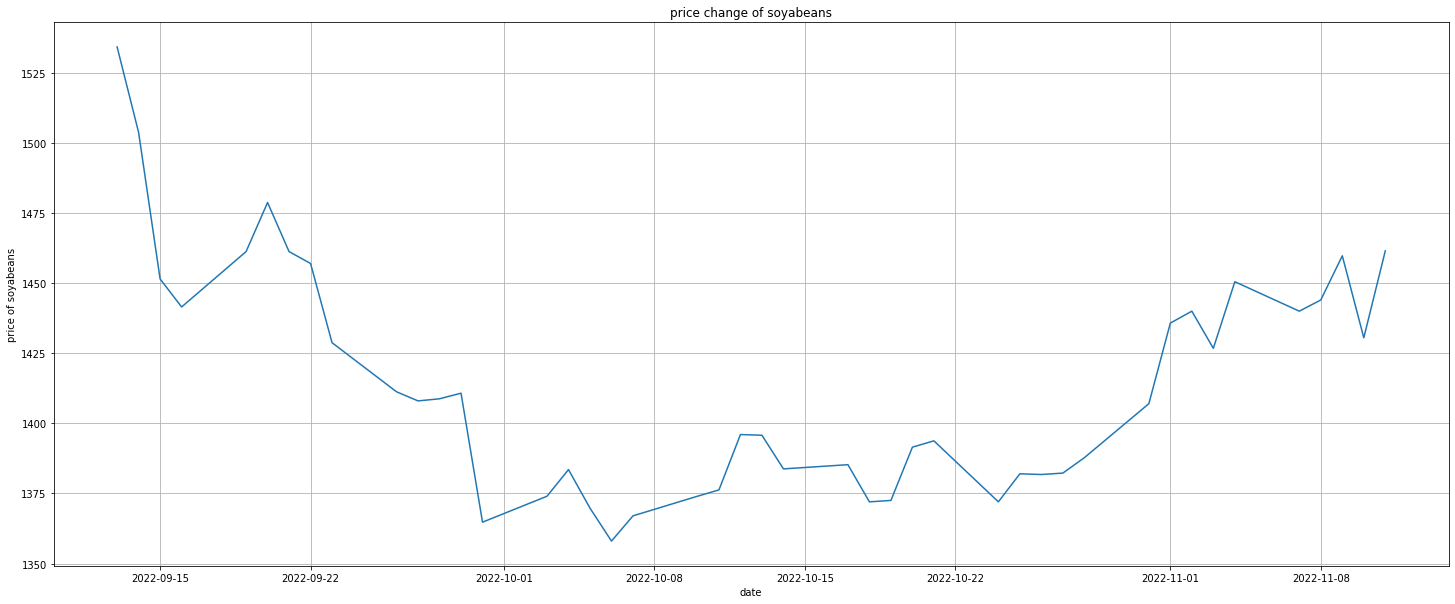

In [ ]:
# Visaulization (price change of the commodity from last 2 months)
plt.figure(figsize=(25,10))
plt.plot(data[start_time:end_time]['Date'], data[start_time:end_time]['SOYBEANS'])
plt.grid()
plt.title('price change of soyabeans')
plt.xlabel('date')
plt.ylabel('price of soyabeans')

<ipython-input-221-8ddf4d2a4e33>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_2_months_soyabean['diff_1'] = data_last_2_months_soyabean['SOYBEANS'].diff(1)
<ipython-input-221-8ddf4d2a4e33>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_2_months_soyabean['diff_2'] = data_last_2_months_soyabean['diff_1'].diff(1)
<ipython-input-221-8ddf4d2a4e33>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

timeseries adf: (-3.171150297175948, 0.021716532236429206, 0, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 384.34920276818855)
timeseries diff_1 adf: (-6.773868034999779, 2.6004309704799123e-09, 0, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 383.5691185244483)
timeseries diff_2 adf: (-5.737453708562567, 6.389354600038412e-07, 5, 54, {'1%': -3.55770911573439, '5%': -2.9167703434435808, '10%': -2.59622219478738}, 390.25431307688945)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5c36b3430>,
      dtype=object)

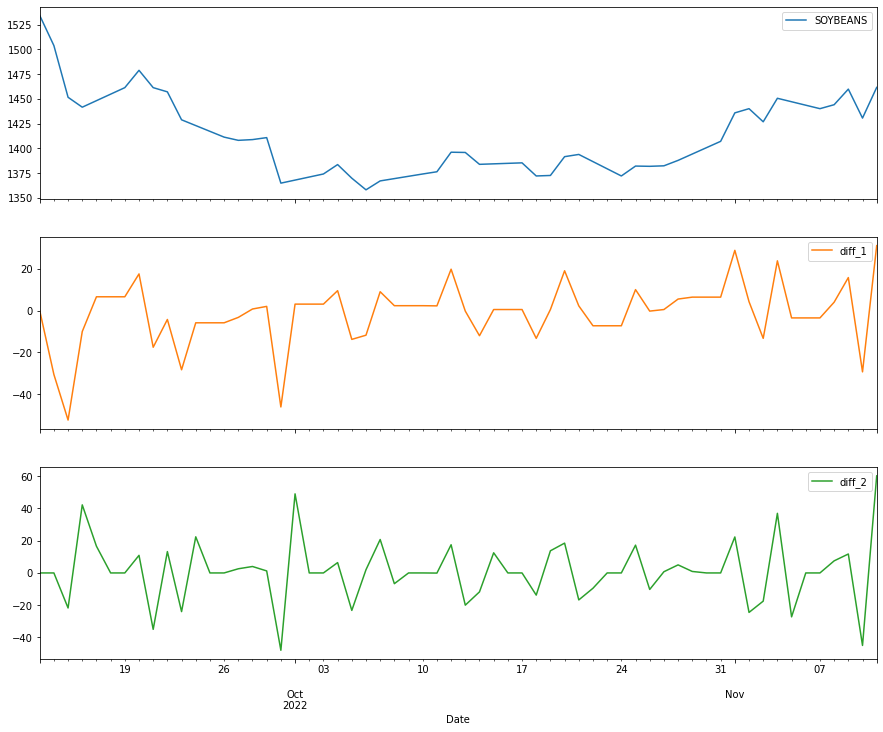

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import seaborn as sns

# Find the fist difference and the second difference of a time series
data_last_2_months_soyabean['diff_1'] = data_last_2_months_soyabean['SOYBEANS'].diff(1)
data_last_2_months_soyabean['diff_2'] = data_last_2_months_soyabean['diff_1'].diff(1)

data_last_2_months_soyabean['diff_1'] = data_last_2_months_soyabean['diff_1'].fillna(0)
data_last_2_months_soyabean['diff_2'] = data_last_2_months_soyabean['diff_2'].fillna(0)

adf = ADF(data_last_2_months_soyabean['SOYBEANS'].tolist())
diff1_adf = ADF(data_last_2_months_soyabean['diff_1'].tolist())
diff2_adf = ADF(data_last_2_months_soyabean['diff_2'].tolist())
print('timeseries adf:', adf)
print('timeseries diff_1 adf:', diff1_adf)
print('timeseries diff_2 adf:', diff2_adf)

# Visualization
data_last_2_months_soyabean.plot(subplots=True, figsize=(15,12))

For parameter 'd' in ARIMA model, we choose d = 1, since the plot of data_last_2_months_soyabean['diff_1'] looks stable enough.

In [ ]:
# delete column diff_1 and column diff_2, because when we apply the ARIMA model, the time series should be 1-dimensional
data_last_2_months_soyabean = data_last_2_months_soyabean.drop(labels=['diff_2'], axis=1)
data_last_2_months_soyabean = data_last_2_months_soyabean.drop(labels=['diff_1'], axis=1)

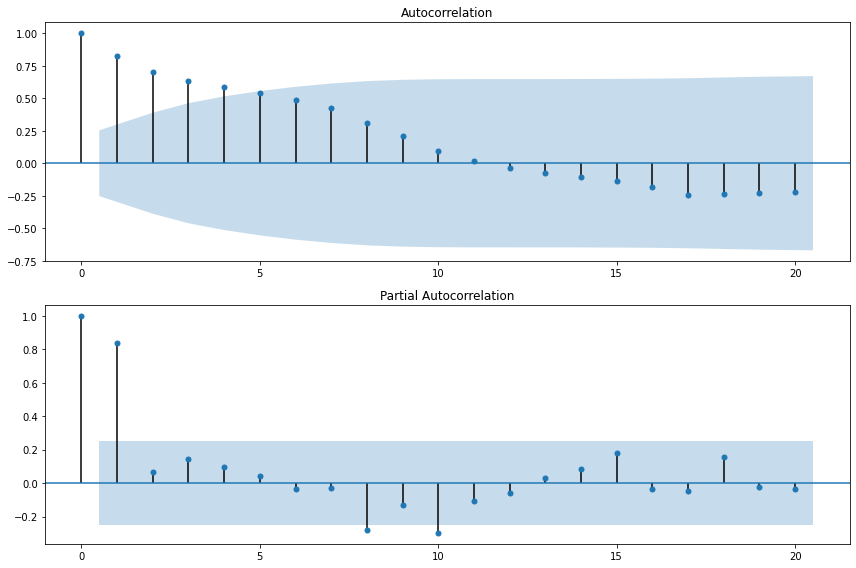

In [ ]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_last_2_months_soyabean, lags=20, ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_last_2_months_soyabean, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()

From the graph above, we can decide p = 1 and q = 4. (More explanation of choosing the value of 'p,d,q' will be in paper)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:               SOYBEANS   No. Observations:                   60
Model:                 ARIMA(1, 1, 4)   Log Likelihood                -241.146
Date:                Mon, 12 Dec 2022   AIC                            494.292
Time:                        07:49:01   BIC                            506.757
Sample:                    09-13-2022   HQIC                           499.158
                         - 11-11-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6620      0.534     -1.239      0.215      -1.709       0.385
ma.L1          0.8540     88.436      0.010      0.992    -172.478     174.186
ma.L2         -0.0283     12.752     -0.002      0.9

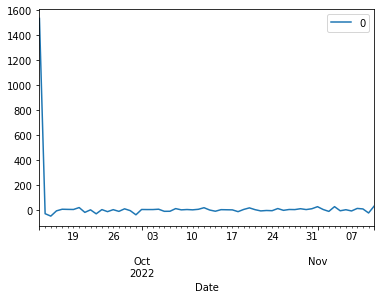

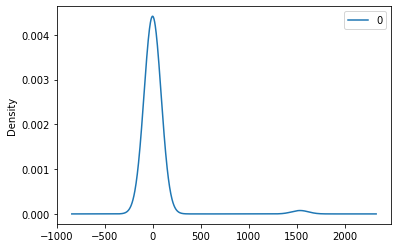

                 0
count    60.000000
mean     24.340232
std     198.761942
min     -49.947201
25%      -7.918915
50%       1.769144
75%       5.205402
max    1534.250000


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
model = ARIMA(data_last_2_months_soyabean, order=(1,1,4))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

computing training MAPE, SMAPE, RMSE
0.007122952175140342
0.007141650753538593
14.553244350668265


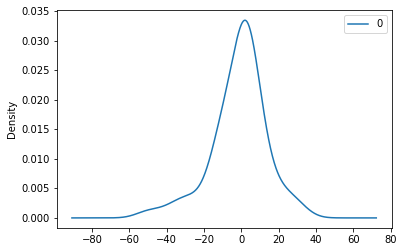

In [ ]:
residuals[1:].plot(kind='kde')

print('computing training MAPE, SMAPE, RMSE')

k = pd.concat([data_last_2_months_soyabean,residuals],axis=1)[1:]

k.columns=['actual','errors']
mape = ((k.errors).abs() / k.actual.abs()).mean()
smape = ((k.errors).abs() / ((k.actual.abs()+(k.actual+k.errors).abs())/2)).mean()
rmse = np.sqrt((k.errors*k.errors).mean())
print(mape)
print(smape)
print(rmse)

In [ ]:
start = pd.to_datetime(max(data['Date'])-timedelta(days=6))
end = pd.to_datetime(max(data['Date']))
predictions = model_fit.predict(start, end)
predictions

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


2022-11-12    1466.930234
2022-11-13    1461.489760
2022-11-14    1467.975770
2022-11-15    1460.356376
2022-11-16    1465.400694
2022-11-17    1462.061170
2022-11-18    1464.272058
Freq: D, Name: predicted_mean, dtype: float64

In [ ]:
residuals_db = pd.DataFrame({'actuals':data[start:end]['SOYBEANS'],'predicted':predictions})
residuals_db = residuals_db.dropna(axis=0)
residuals_db['residiue']=residuals_db['actuals']-residuals_db['predicted']
residuals_db['abs_residiue']=abs(residuals_db['actuals']-residuals_db['predicted'])
residuals_db['APE']=abs(residuals_db['actuals']-residuals_db['predicted'])/residuals_db['actuals']
residuals_db

,actuals,predicted,residiue,abs_residiue,APE
2022-11-14,1441.75,1467.975770,-26.225770,26.225770,0.018190
2022-11-15,1457.25,1460.356376,-3.106376,3.106376,0.002132
2022-11-16,1429.25,1465.400694,-36.150694,36.150694,0.025293
2022-11-17,1417.00,1462.061170,-45.061170,45.061170,0.031800
2022-11-18,1429.25,1464.272058,-35.022058,35.022058,0.024504


In [ ]:
residuals_db.to_excel('drive/My Drive/Predictions4.xlsx', sheet_name='SOYBEANS', index=True)
residuals_db_soybeans=residuals_db[['actuals','predicted']]
residuals_db.APE.mean()

0.0203839157392779

In [ ]:
print('computing testing MAPE, SMAPE, RMSE')
print(residuals_db.APE.mean())
print((residuals_db.abs_residiue/((residuals_db.actuals+residuals_db.predicted)/2)).mean())
print(np.sqrt((residuals_db.residiue*residuals_db.residiue).mean()))

computing testing MAPE, SMAPE, RMSE
0.0203839157392779
0.020128633928505165
32.438763386401625


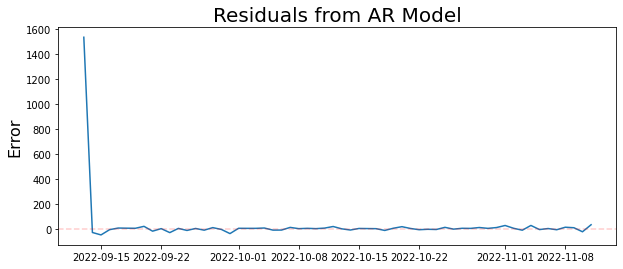

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

PREDICT PRICE FOR SOYBEAN OIL

In [ ]:
data_last_2_months_soybean_oil = data_last_2_months[['SOYBEAN OIL']]

# Fill the missing date with some data:
data_last_2_months_soybean_oil['SOYBEAN OIL'] = data_last_2_months_soybean_oil['SOYBEAN OIL'].interpolate(method='time')
data_last_2_months_soybean_oil

<ipython-input-231-e52c2c6bfb66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_2_months_soybean_oil['SOYBEAN OIL'] = data_last_2_months_soybean_oil['SOYBEAN OIL'].interpolate(method='time')


,SOYBEAN OIL
Date,
2022-09-13,71.960000
2022-09-14,68.510000
2022-09-15,66.790000
2022-09-16,67.600000
2022-09-17,67.733333
2022-09-18,67.866667
2022-09-19,68.000000
2022-09-20,68.590000
2022-09-21,67.830000


Text(0, 0.5, 'price of soybean oil')

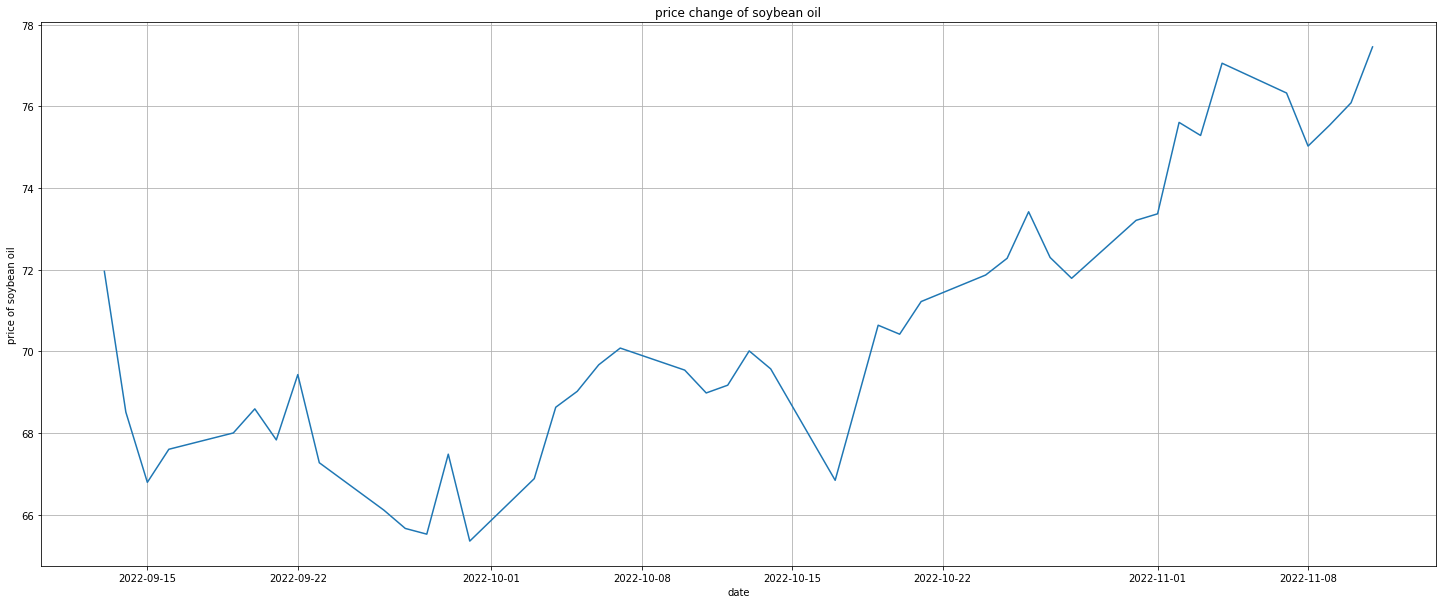

In [ ]:
# Visaulization (price change of the commodity from last 2 months)
plt.figure(figsize=(25,10))
plt.plot(data[start_time:end_time]['Date'], data[start_time:end_time]['SOYBEAN OIL'])
plt.grid()
plt.title('price change of soybean oil')
plt.xlabel('date')
plt.ylabel('price of soybean oil')

<ipython-input-233-232e9a6d9152>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_2_months_soybean_oil['diff_1'] = data_last_2_months_soybean_oil['SOYBEAN OIL'].diff(1)
<ipython-input-233-232e9a6d9152>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_last_2_months_soybean_oil['diff_2'] = data_last_2_months_soybean_oil['diff_1'].diff(1)
<ipython-input-233-232e9a6d9152>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

timeseries adf: (-0.30508807722185227, 0.9247806104918509, 0, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 130.53527750049477)
timeseries diff_1 adf: (-7.373730626682593, 8.833481183792807e-11, 0, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 130.52871585868706)
timeseries diff_2 adf: (-5.248434555279235, 6.996101183942931e-06, 5, 54, {'1%': -3.55770911573439, '5%': -2.9167703434435808, '10%': -2.59622219478738}, 141.38876420182106)


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5c4530e50>,
      dtype=object)

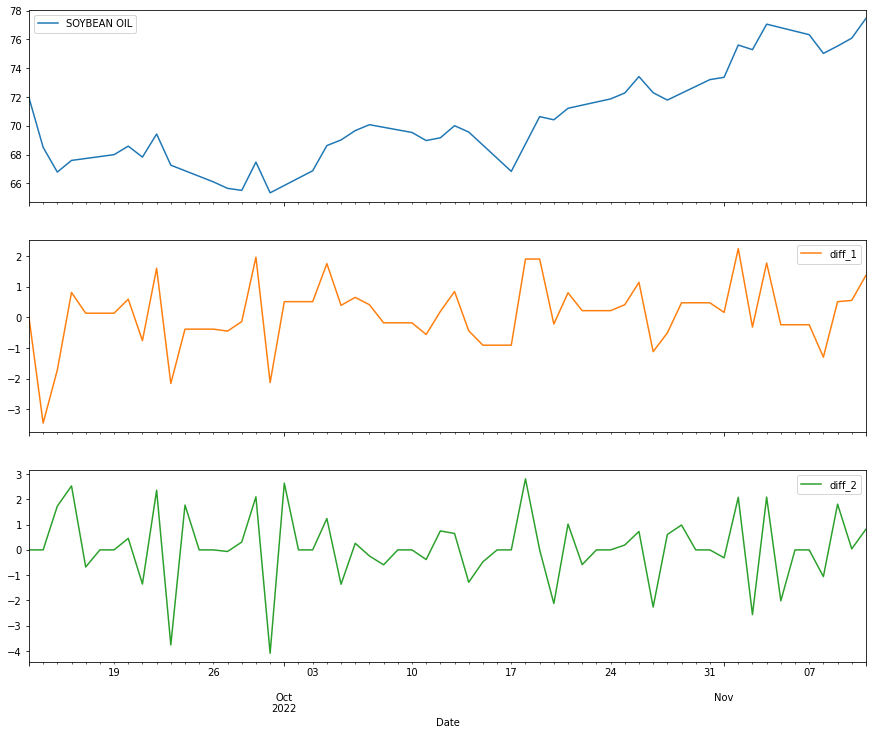

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import seaborn as sns

# Find the fist difference and the second difference of a time series
data_last_2_months_soybean_oil['diff_1'] = data_last_2_months_soybean_oil['SOYBEAN OIL'].diff(1)
data_last_2_months_soybean_oil['diff_2'] = data_last_2_months_soybean_oil['diff_1'].diff(1)

data_last_2_months_soybean_oil['diff_1'] = data_last_2_months_soybean_oil['diff_1'].fillna(0)
data_last_2_months_soybean_oil['diff_2'] = data_last_2_months_soybean_oil['diff_2'].fillna(0)

adf = ADF(data_last_2_months_soybean_oil['SOYBEAN OIL'].tolist())
diff1_adf = ADF(data_last_2_months_soybean_oil['diff_1'].tolist())
diff2_adf = ADF(data_last_2_months_soybean_oil['diff_2'].tolist())
print('timeseries adf:', adf)
print('timeseries diff_1 adf:', diff1_adf)
print('timeseries diff_2 adf:', diff2_adf)

# Visualization
data_last_2_months_soybean_oil.plot(subplots=True, figsize=(15,12))

For parameter 'd' in ARIMA model, we choose d = 1, since the plot of data_last_2_months_soyabean['diff_1'] looks stable enough.

In [ ]:
# delete column diff_1 and column diff_2, because when we apply the ARIMA model, the time series should be 1-dimensional
data_last_2_months_soybean_oil = data_last_2_months_soybean_oil.drop(labels=['diff_2'], axis=1)
data_last_2_months_soybean_oil = data_last_2_months_soybean_oil.drop(labels=['diff_1'], axis=1)

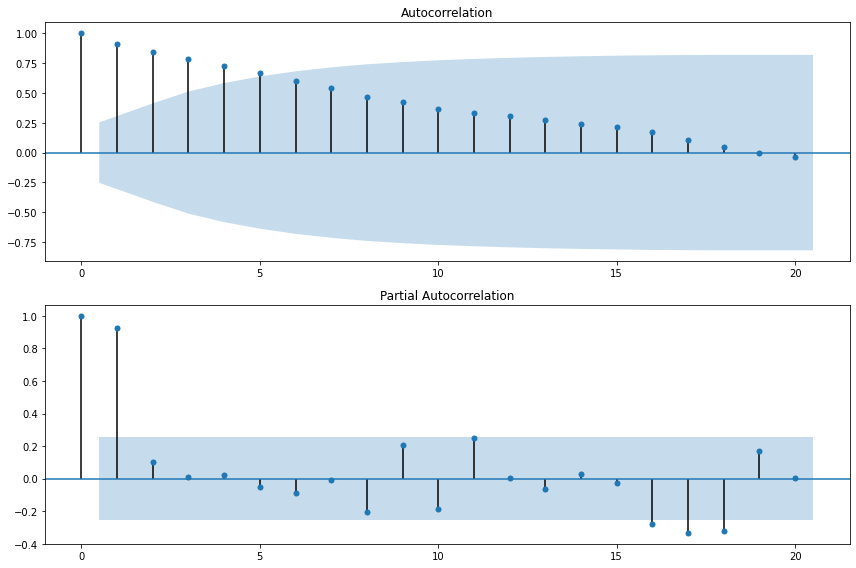

In [ ]:
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data_last_2_months_soybean_oil, lags=20, ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data_last_2_months_soybean_oil, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()

From the graph above, we can decide p = 1 and q = 4. (More explanation of choosing the value of 'p,d,q' will be in paper)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:            SOYBEAN OIL   No. Observations:                   60
Model:                 ARIMA(1, 1, 5)   Log Likelihood                 -84.097
Date:                Mon, 12 Dec 2022   AIC                            182.195
Time:                        07:49:10   BIC                            196.737
Sample:                    09-13-2022   HQIC                           187.871
                         - 11-11-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7325      0.473     -1.549      0.121      -1.659       0.194
ma.L1          0.8515      4.671      0.182      0.855      -8.304      10.007
ma.L2          0.0565      0.645      0.088      0.9

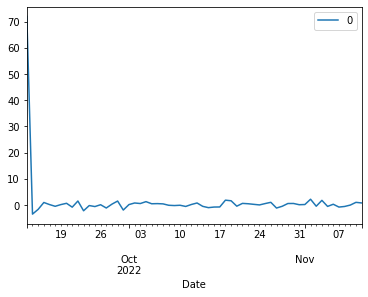

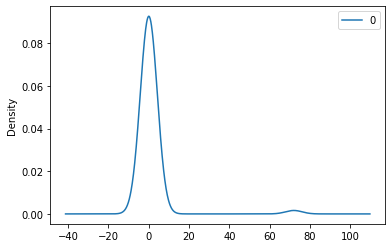

               0
count  60.000000
mean    1.283664
std     9.333827
min    -3.450002
25%    -0.490872
50%     0.192587
75%     0.650828
max    71.960000


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
model = ARIMA(data_last_2_months_soybean_oil, order=(1,1,5))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

computing training MAPE, SMAPE, RMSE
0.0110815194308078
0.011090159172781203
1.0145127928160218


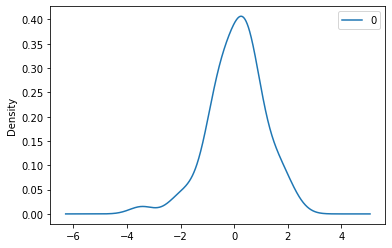

In [ ]:
residuals[1:].plot(kind='kde')
print('computing training MAPE, SMAPE, RMSE')

k=pd.concat([data_last_2_months_soybean_oil,residuals],axis=1)[1:]

k.columns=['actual','errors']
mape = ((k.errors).abs() / k.actual.abs()).mean()
smape = ((k.errors).abs() / ((k.actual.abs()+(k.actual+k.errors).abs())/2)).mean()
rmse = np.sqrt((k.errors*k.errors).mean())
print(mape)
print(smape)
print(rmse)

In [ ]:
start = pd.to_datetime(max(data['Date'])-timedelta(days=6))
end = pd.to_datetime(max(data['Date']))
predictions = model_fit.predict(start, end)
print(predictions)

2022-11-12    77.310847
2022-11-13    77.542307
2022-11-14    77.238145
2022-11-15    77.289159
2022-11-16    77.227323
2022-11-17    77.272616
2022-11-18    77.239440
Freq: D, Name: predicted_mean, dtype: float64


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [ ]:
residuals_db = pd.DataFrame({'actuals':data[start:end]['SOYBEAN OIL'],'predicted':predictions})
residuals_db = residuals_db.dropna(axis=0)
residuals_db['residiue']=residuals_db['actuals']-residuals_db['predicted']
residuals_db['abs_residiue']=abs(residuals_db['actuals']-residuals_db['predicted'])
residuals_db['APE']=abs(residuals_db['actuals']-residuals_db['predicted'])/residuals_db['actuals']
residuals_db

,actuals,predicted,residiue,abs_residiue,APE
2022-11-14,76.28,77.238145,-0.958145,0.958145,0.012561
2022-11-15,76.98,77.289159,-0.309159,0.309159,0.004016
2022-11-16,74.08,77.227323,-3.147323,3.147323,0.042485
2022-11-17,72.13,77.272616,-5.142616,5.142616,0.071296
2022-11-18,72.79,77.239440,-4.449440,4.449440,0.061127


In [ ]:
residuals_db.to_excel('drive/My Drive/Predictions5.xlsx', sheet_name='SOYBEAN OIL', index=True)
residuals_db_soyabean_oil=residuals_db[['actuals','predicted']]
print(residuals_db)

            actuals  predicted  residiue  abs_residiue       APE
2022-11-14    76.28  77.238145 -0.958145      0.958145  0.012561
2022-11-15    76.98  77.289159 -0.309159      0.309159  0.004016
2022-11-16    74.08  77.227323 -3.147323      3.147323  0.042485
2022-11-17    72.13  77.272616 -5.142616      5.142616  0.071296
2022-11-18    72.79  77.239440 -4.449440      4.449440  0.061127


In [ ]:
print('computing testing MAPE, SMAPE, RMSE')
print(residuals_db.APE.mean())
print((residuals_db.abs_residiue/((residuals_db.actuals+residuals_db.predicted)/2)).mean())
print(np.sqrt((residuals_db.residiue*residuals_db.residiue).mean()))

computing testing MAPE, SMAPE, RMSE
0.03829720636870345
0.03724977806752884
3.381221168353689


0.03829720636870345

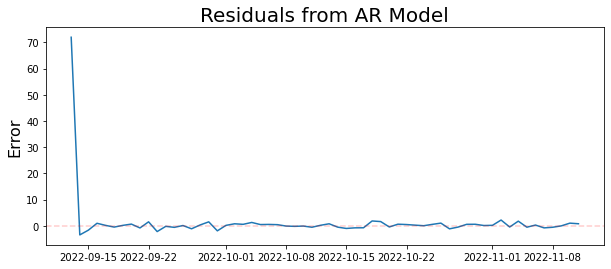

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

residuals_db.APE.mean()

Visualization:

In [ ]:
from openpyxl.chart import LineChart,BarChart,Reference
from openpyxl.chart.axis import DateAxis
# Call a Workbook() function of openpyxl
# to create a new blank Workbook object 

In [ ]:
residuals_db_soyabean_oil=residuals_db_soyabean_oil.reset_index()
residuals_db_soybeans=residuals_db_soybeans.reset_index()
residuals_db_cotton=residuals_db_cotton.reset_index()
residuals_db_natural_gas=residuals_db_natural_gas.reset_index()
residuals_db_gold=residuals_db_gold.reset_index()

In [ ]:
residuals_db_soyabean_oil.columns=['Date','actuals','predicted']
residuals_db_soybeans.columns=['Date','actuals','predicted']
residuals_db_cotton.columns=['Date','actuals','predicted']
residuals_db_natural_gas.columns=['Date','actuals','predicted']
residuals_db_gold.columns=['Date','actuals','predicted']

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('check').sheet1
cell_list = worksheet.range('A2:C6')
residuals_db_natural_gas['Date']=residuals_db_natural_gas['Date'].astype('str')
import random
k=0
for cell in cell_list:
  i=k//3
  j=k%3
  cell.value = residuals_db_natural_gas.iloc[i][j]
  k=k+1
worksheet.update_cells(cell_list)

{'spreadsheetId': '1XHnUku8NsqbRauLUnSKScr-eGGZCGomZv8AHaAkHXfc',
 'updatedRange': 'Sheet1!A2:C6',
 'updatedRows': 5,
 'updatedColumns': 3,
 'updatedCells': 15}

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# Open our new sheet and add some data.
worksheet = gc.open('check').sheet1

cell_list = worksheet.range('D2:F6')
residuals_db_gold['Date']=residuals_db_gold['Date'].astype('str')
import random
k=0
for cell in cell_list:
  i=k//3
  j=k%3
  cell.value = residuals_db_gold.iloc[i][j]
  k=k+1

worksheet.update_cells(cell_list)

{'spreadsheetId': '1XHnUku8NsqbRauLUnSKScr-eGGZCGomZv8AHaAkHXfc',
 'updatedRange': 'Sheet1!D2:F6',
 'updatedRows': 5,
 'updatedColumns': 3,
 'updatedCells': 15}

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# Open our new sheet and add some data.
worksheet = gc.open('check').sheet1

cell_list = worksheet.range('G2:I6')
residuals_db_cotton['Date']=residuals_db_cotton['Date'].astype('str')
import random
k=0
for cell in cell_list:
  i=k//3
  j=k%3
  cell.value = residuals_db_cotton.iloc[i][j]
  k=k+1

worksheet.update_cells(cell_list)

{'spreadsheetId': '1XHnUku8NsqbRauLUnSKScr-eGGZCGomZv8AHaAkHXfc',
 'updatedRange': 'Sheet1!G2:I6',
 'updatedRows': 5,
 'updatedColumns': 3,
 'updatedCells': 15}

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

#sh = gc.create('A new spreadsheet')

# Open our new sheet and add some data.
worksheet = gc.open('check').sheet1

cell_list = worksheet.range('J2:L6')
residuals_db_soybeans['Date']=residuals_db_soybeans['Date'].astype('str')
import random
k=0
for cell in cell_list:
  i=k//3
  j=k%3
  #print(i)
  #print(j)
  cell.value = residuals_db_soybeans.iloc[i][j]
  k=k+1

worksheet.update_cells(cell_list)

{'spreadsheetId': '1XHnUku8NsqbRauLUnSKScr-eGGZCGomZv8AHaAkHXfc',
 'updatedRange': 'Sheet1!J2:L6',
 'updatedRows': 5,
 'updatedColumns': 3,
 'updatedCells': 15}

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

#sh = gc.create('A new spreadsheet')

# Open our new sheet and add some data.
worksheet = gc.open('check').sheet1

cell_list = worksheet.range('M2:O6')
residuals_db_soyabean_oil['Date']=residuals_db_soyabean_oil['Date'].astype('str')
import random
k=0
for cell in cell_list:
  i=k//3
  j=k%3
  #print(i)
  #print(j)
  cell.value = residuals_db_soyabean_oil.iloc[i][j]
  k=k+1

worksheet.update_cells(cell_list)

{'spreadsheetId': '1XHnUku8NsqbRauLUnSKScr-eGGZCGomZv8AHaAkHXfc',
 'updatedRange': 'Sheet1!M2:O6',
 'updatedRows': 5,
 'updatedColumns': 3,
 'updatedCells': 15}